# 1 Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.quickml.reader import read_csv
from scripts.quickml.plot import dataframe_distribution_overview, feature_filling, feature_distribution_univar, feature_trend_bivar, feature_distribution_bivar
from scripts.quickml.compare import index_lth
from scripts.utils import fill_infos

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2 Data import

For performance reasons, i choose to write a function that allow me to "chunk" the dataset and only take a percentage. I use a method for taking randomly the rows in each chunk, the result is that the output dataset have the same shape than if it was the original one.

In [2]:
original_dataset = read_csv(pd, np, "./datas/en.openfoodfacts.org.products.csv", 5, delimiter="\t", chunk_size=10000, nrows=10000)

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
rows_nb, cols_nb = original_dataset.shape
original_dataset.shape

(500, 186)

In [4]:
original_dataset.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
5370,10924500166,http://world-en.openfoodfacts.org/product/0010...,usda-ndb-import,1489133449,2017-03-10T08:10:49Z,1587596484,2020-04-22T23:01:24Z,Cookies'N Cream Cake,NaN,NaN,...,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5474,11027,http://world-en.openfoodfacts.org/product/0011...,openfoodfacts-contributors,1620708195,2021-05-11T04:43:15Z,1620708463,2021-05-11T04:47:43Z,Vitadulce,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5548,11110003249,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489064105,2017-03-09T12:55:05Z,1587579123,2020-04-22T18:12:03Z,"Kroger, seasoned salt",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989,11110660329,http://world-en.openfoodfacts.org/product/0011...,recipekeepapp,1466115670,2016-06-16T22:21:10Z,1627178798,2021-07-25T02:06:38Z,Honey roasted peanuts,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1584,00011631,http://world-en.openfoodfacts.org/product/0001...,kiliweb,1570788469,2019-10-11T10:07:49Z,1570788470,2019-10-11T10:07:50Z,Pasta box carbonara,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = original_dataset.copy()

***
# 3 Cleaning

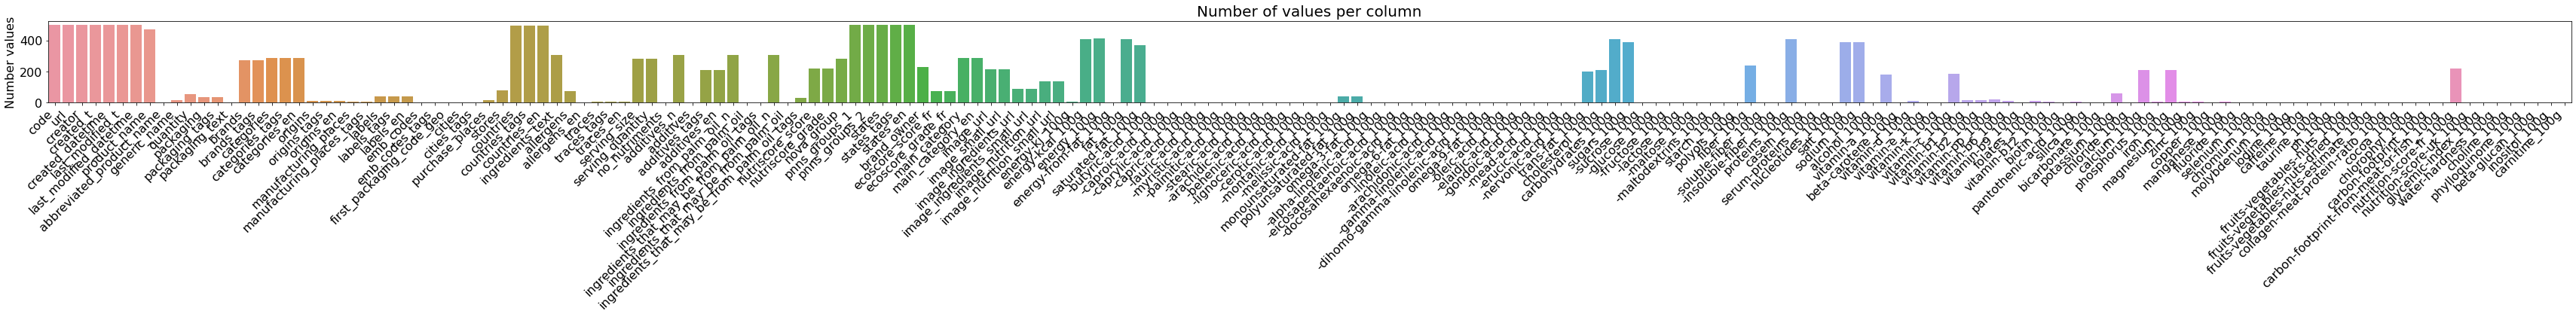

In [6]:
dataframe_distribution_overview(data, figsize=(60, 2))

### Shape comparison with original dataset

Original dataset  
![dataset_100_percent](images/global_overview_100p.png)

In [7]:
features = []

***
## 3.1 General informations group

### 3.1.1 Overview

In [8]:
general_infos_features = data.loc[:, "code":"quantity"].columns
general_infos_features

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name', 'quantity'],
      dtype='object')

In [9]:
general_infos = data.loc[:, general_infos_features]

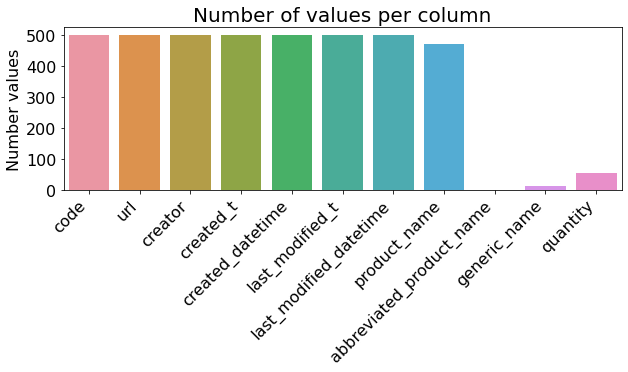

In [10]:
dataframe_distribution_overview(general_infos)

In [11]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity
5370,10924500166,http://world-en.openfoodfacts.org/product/0010...,usda-ndb-import,1489133449,2017-03-10T08:10:49Z,1587596484,2020-04-22T23:01:24Z,Cookies'N Cream Cake,NaN,NaN,NaN
5474,11027,http://world-en.openfoodfacts.org/product/0011...,openfoodfacts-contributors,1620708195,2021-05-11T04:43:15Z,1620708463,2021-05-11T04:47:43Z,Vitadulce,NaN,NaN,400
5548,11110003249,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489064105,2017-03-09T12:55:05Z,1587579123,2020-04-22T18:12:03Z,"Kroger, seasoned salt",NaN,NaN,NaN
7989,11110660329,http://world-en.openfoodfacts.org/product/0011...,recipekeepapp,1466115670,2016-06-16T22:21:10Z,1627178798,2021-07-25T02:06:38Z,Honey roasted peanuts,NaN,NaN,12 oz
1584,00011631,http://world-en.openfoodfacts.org/product/0001...,kiliweb,1570788469,2019-10-11T10:07:49Z,1570788470,2019-10-11T10:07:50Z,Pasta box carbonara,NaN,NaN,NaN


In [12]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      500 non-null    object 
 1   url                       500 non-null    object 
 2   creator                   500 non-null    object 
 3   created_t                 500 non-null    int64  
 4   created_datetime          500 non-null    object 
 5   last_modified_t           500 non-null    int64  
 6   last_modified_datetime    500 non-null    object 
 7   product_name              471 non-null    object 
 8   abbreviated_product_name  0 non-null      float64
 9   generic_name              15 non-null     object 
 10  quantity                  55 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 46.9+ KB


***
### 3.1.2 Usability

#### 3.1.2.1 Usability: Quantity

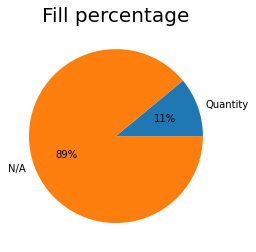

In [13]:
feature_filling(general_infos, "quantity", "Quantity")

In [14]:
general_infos[general_infos.quantity.notna()].quantity.head(10)

5474           400
7989         12 oz
2624          380g
2269           1kl
1795      218,8 gr
2912          400g
8031    3 OZ (85g)
6874        1.38oz
4668         16 oz
2143          50 g
Name: quantity, dtype: object

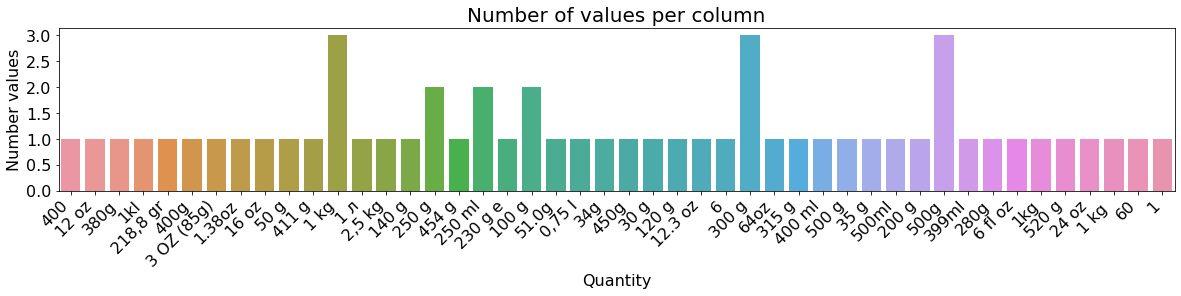

In [20]:
feature_distribution_univar(general_infos, "quantity", "Quantity", (20, 3))

The feature "quantity" is highly non homogeneous and will be very difficult to use. We will not keep it.

In [21]:
general_infos.drop(columns=["quantity"], inplace=True)

#### 3.1.2.2 Usability: abbreviated_product_name

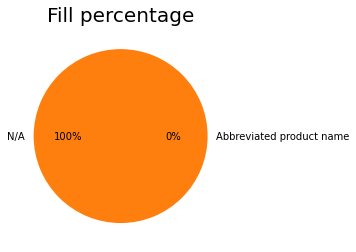

In [22]:
feature_filling(general_infos, "abbreviated_product_name", "Abbreviated product name")

In [23]:
general_infos[general_infos["abbreviated_product_name"].notna()].loc[:, ["abbreviated_product_name"]].head()

,abbreviated_product_name


The fill percentage of 'abbreviated_product_name" is very low, we can rid of it.

In [24]:
general_infos.drop(columns=["abbreviated_product_name"], inplace=True)

#### 3.1.2.3 Usability: generic_name

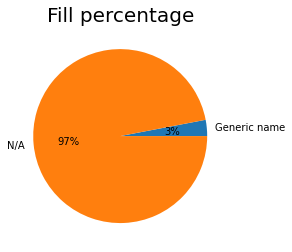

In [25]:
feature_filling(general_infos, "generic_name", "Generic name")

In [26]:
general_infos.drop(columns=["generic_name"], inplace=True)

***
### 3.1.3 Redundancy

***
### 3.1.4 Conclusion

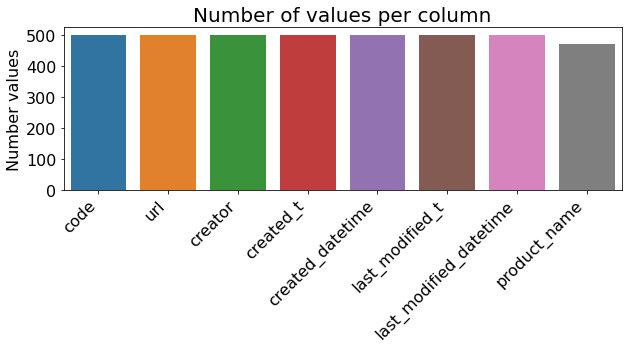

In [130]:
dataframe_distribution_overview(general_infos)

#### 3.1.4.1 Original

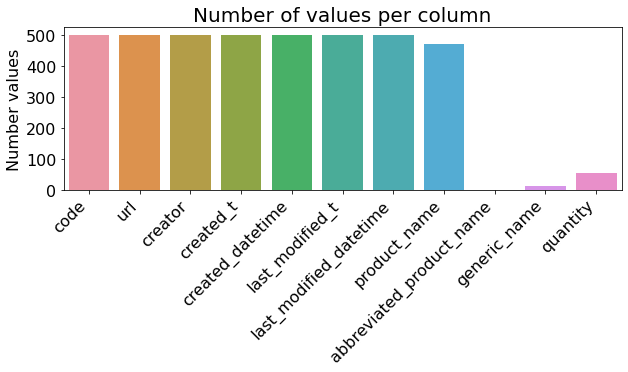

In [133]:
dataframe_distribution_overview(data[general_infos_features])

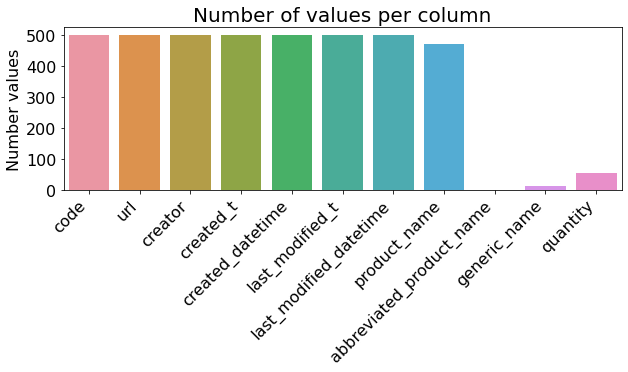

In [28]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos_features, y=data[general_infos_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.2 Tags group

### 3.2.1 Overview

In [137]:
tags_features = data.loc[:, "packaging":"countries_en"].columns
tags_features

Index(['packaging', 'packaging_tags', 'packaging_text', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'origins_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en'],
      dtype='object')

In [138]:
tags = data.loc[:, tags_features]

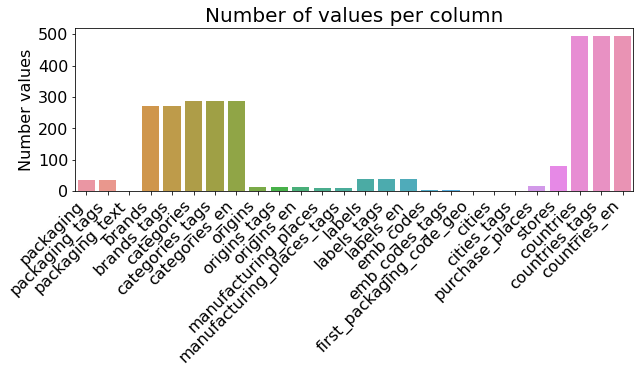

In [31]:
dataframe_distribution_overview(tags)

In [32]:
tags.head()

,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,...,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
5370,NaN,NaN,NaN,Portland Specialty Baking,portland-specialty-baking,"Biscuits and cakes, Cakes","en:biscuits-and-cakes,en:cakes","Biscuits and cakes,Cakes",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
5474,plastique,plastique,NaN,Vitadulce,vitadulce,fr:Sirop,en:syrups,Syrups,Espagne,en:espagne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5548,NaN,NaN,NaN,Kroger,kroger,"Groceries, Condiments","en:groceries,en:condiments","Groceries,Condiments",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kroger,United States,en:united-states,United States
7989,NaN,NaN,NaN,Kroger,kroger,Snacks,en:snacks,Snacks,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kroger,United States,en:united-states,United States
1584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:fr,en:france,France


In [33]:
tags.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packaging                  36 non-null     object
 1   packaging_tags             36 non-null     object
 2   packaging_text             0 non-null      object
 3   brands                     271 non-null    object
 4   brands_tags                271 non-null    object
 5   categories                 287 non-null    object
 6   categories_tags            287 non-null    object
 7   categories_en              287 non-null    object
 8   origins                    13 non-null     object
 9   origins_tags               13 non-null     object
 10  origins_en                 13 non-null     object
 11  manufacturing_places       9 non-null      object
 12  manufacturing_places_tags  9 non-null      object
dtypes: object(13)
memory usage: 70.9+ KB


In [34]:
tags.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    40 non-null     object 
 1   labels_tags               40 non-null     object 
 2   labels_en                 40 non-null     object 
 3   emb_codes                 3 non-null      object 
 4   emb_codes_tags            3 non-null      object 
 5   first_packaging_code_geo  0 non-null      object 
 6   cities                    0 non-null      float64
 7   cities_tags               0 non-null      object 
 8   purchase_places           17 non-null     object 
 9   stores                    80 non-null     object 
 10  countries                 495 non-null    object 
 11  countries_tags            495 non-null    object 
 12  countries_en              495 non-null    object 
dtypes: float64(1), object(12)
memory usage: 70.9+ KB


***
### 3.2.2 Usability

#### 3.2.2.1 Usability: packaging_text

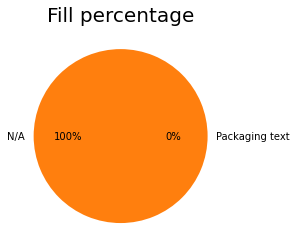

In [35]:
feature_filling(tags, "packaging_text", "Packaging text")

In [36]:
tags.drop(columns=["packaging_text"], inplace=True)

***
#### 3.2.2.2 Usability: cities

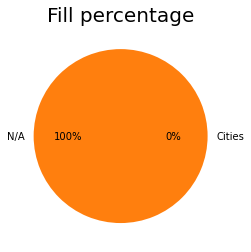

In [37]:
feature_filling(tags, "cities", "Cities")

In [38]:
tags.drop(columns=["cities"], inplace=True)

***
### 3.2.3 Redundancy

#### 3.2.3.1 Redundancy: packaging, packaging_tags

In [39]:
tags.loc[:, ["packaging", "packaging_tags"]].loc[tags.packaging.notna() & tags.packaging_tags.notna()].iloc[:20]

,packaging,packaging_tags
5474,plastique,plastique
2726,en:card-pot,en-card-pot
2109,"boîte,métal","boite,metal"
3242,en:pet-bottle,en-pet-bottle
1795,Sachet plastique,sachet-plastique
2912,Fresh,fresh
4668,plastic,plastic
698,beutel,beutel
942,"Plastique,Doypack,Sachet,Pochon,Sachet refermable","plastique,doypack,sachet,pochon,sachet-refermable"
4633,Пласмасова,пласмасова


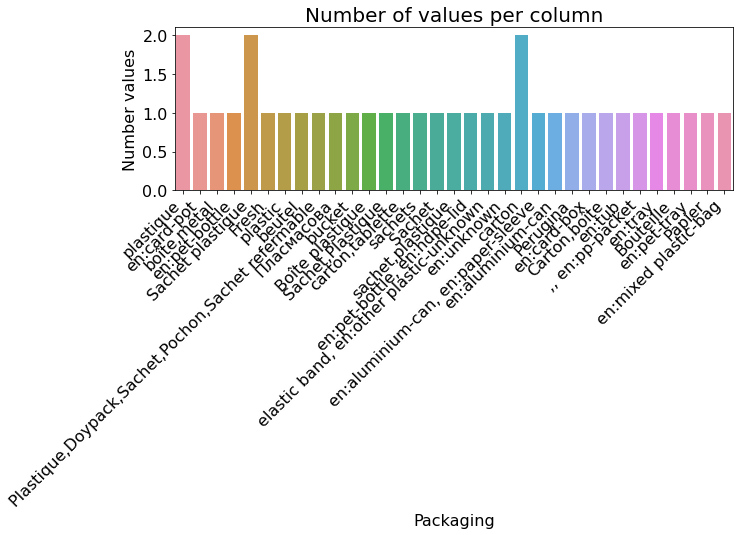

In [139]:
feature_distribution_univar(tags, "packaging", "Packaging")

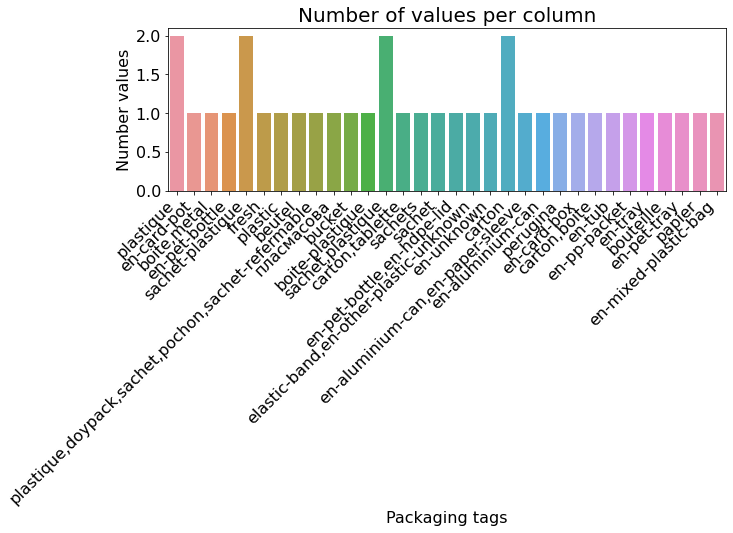

In [140]:
feature_distribution_univar(tags, "packaging_tags", "Packaging tags")

In [152]:
tags["packaging_code"] = tags["packaging"].astype("category").cat.codes
tags["packaging_tags_code"] = tags["packaging_tags"].astype("category").cat.codes

tags.loc[:, ["packaging_code", "packaging_tags_code"]].corr()

,packaging_code,packaging_tags_code
packaging_code,1.000000,0.833828
packaging_tags_code,0.833828,1.000000


We can see that each time one of the features "packaging" or "packaging_tags" is filled, the other is also filled.
We will keep the feature "packaging" because it transport more information, plus, it's easier to get rid of the "en:", "fr:" than "en-", because in "packaging_tags" each separator is a "-" and not in "packaging".

In [41]:
tags.drop(columns=["packaging_tags"], inplace=True)

***
#### 3.2.3.2 Redundancy: brands, brands_tags

In [42]:
tags.iloc[:20].loc[:, ["brands", "brands_tags"]]

,brands,brands_tags
5370,Portland Specialty Baking,portland-specialty-baking
5474,Vitadulce,vitadulce
5548,Kroger,kroger
7989,Kroger,kroger
1584,NaN,NaN
2726,Stntus,stntus
74,NaN,NaN
5685,NaN,NaN
2294,NaN,NaN
3291,NaN,NaN


In [43]:
tags[tags.brands_tags.notna()].loc[:,["brands"]].isna().sum()

brands    0
dtype: int64

The features "brands" and "brands_tags" are almost equally filled. We will keep "brands" because this feature carry most information (spaces, capital letters...)

In [44]:
tags.drop(columns=["brands_tags"], inplace=True)

***
#### 3.2.3.3 Redundancy: categories, categories_tags, categories_en

In [45]:
tags.loc[:, ["categories", "categories_tags", "categories_en"]].iloc[:20]

,categories,categories_tags,categories_en
5370,"Biscuits and cakes, Cakes","en:biscuits-and-cakes,en:cakes","Biscuits and cakes,Cakes"
5474,fr:Sirop,en:syrups,Syrups
5548,"Groceries, Condiments","en:groceries,en:condiments","Groceries,Condiments"
7989,Snacks,en:snacks,Snacks
1584,NaN,NaN,NaN
2726,NaN,NaN,NaN
74,"Conserves, Viandes, Plats préparés, Produits à...","en:canned-foods,en:meats,en:meals,en:meat-base...","Canned foods,Meats,Meals,Meat-based products,M..."
5685,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
2294,NaN,NaN,NaN
3291,"Biscuits and cakes, Cakes","en:biscuits-and-cakes,en:cakes","Biscuits and cakes,Cakes"


In [46]:
tags[tags.categories.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

In [47]:
tags[tags.categories_tags.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

We will keep "categories_en".

In [48]:
tags.drop(columns=["categories", "categories_tags"], inplace=True)

***
#### 3.2.3.4 Redundancy: origins, origins_tags, origins_en

In [49]:
tags.loc[:, ["origins", "origins_tags", "origins_en"]].loc[tags.origins.notna() & tags.origins_tags.notna() & tags.origins_en.notna()].iloc[:20]

,origins,origins_tags,origins_en
5474,Espagne,en:espagne,Espagne
1795,France,en:france,France
2912,England,en:england,England
942,UE,en:european-union,European Union
4633,Italy,en:italy,Italy
878,Germany,en:germany,Germany
2498,France,en:france,France
4669,Madagascar,en:madagascar,Madagascar
824,Germany,en:germany,Germany
2289,Italia,en:italy,Italy


In [50]:
tags[tags.origins_tags.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

In [51]:
tags[tags.origins_en.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

We will keep the feature "origins"

In [52]:
tags.drop(columns=["origins_tags", "origins_en"], inplace=True)

***
#### 3.2.3.5 Redundancy: manufacturing_places, manufacturing_places_tags

In [53]:
tags.loc[:, ["manufacturing_places", "manufacturing_places_tags"]].loc[tags.manufacturing_places.notna() & tags.manufacturing_places_tags.notna()].iloc[:20]

,manufacturing_places,manufacturing_places_tags
4633,Italy,italy
878,Germany,germany
4669,Italie,italie
2385,UK,uk
3547,Belgique,belgique
420,"France,Avranches","france,avranches"
3515,Italie,italie
3344,Italie,italie
1932,Good Organics Gmbh,good-organics-gmbh


We will keep the feature "manufacturing_places"

In [54]:
tags.drop(columns=["manufacturing_places_tags"], inplace=True)

***
#### 3.2.3.6 labels, labels_tags, labels_en

In [55]:
tags.loc[:, ["labels", "labels_tags", "labels_en"]].loc[tags.labels.notna() & tags.labels_en.notna() & tags.labels_en.notna()].iloc[:20]

,labels,labels_tags,labels_en
5474,sans sucre,en:sans-sucre,Sans-sucre
2218,Fabriqué en Italie,en:made-in-italy,Made in Italy
7064,Organic,en:organic,Organic
2269,"Végétarien, en:gluten-free, Végétalien","en:vegetarian,en:no-gluten,en:vegan","Vegetarian,No gluten,Vegan"
256,Organic,en:organic,Organic
838,en:fr-bio-01,"en:organic,en:eu-organic,en:fr-bio-01","Organic,EU Organic,FR-BIO-01"
3069,en:vegan,"en:vegetarian,en:vegan","Vegetarian,Vegan"
942,"Végétarien, en:gluten-free, Sans OGM, Riche en...","en:vegetarian,en:no-gluten,en:high-proteins,en...","Vegetarian,No gluten,High proteins,No GMOs,Sup..."
4633,Напитка,bg:напитка,bg:напитка
7573,Organic,en:organic,Organic


We will keep "labels_en"

In [56]:
tags.drop(columns=["labels", "labels_tags"], inplace=True)

***
#### 3.2.3.7 emb_codes, emb_codes_tags

In [57]:
tags.loc[:, ["emb_codes", "emb_codes_tags"]].loc[tags.emb_codes.notna() & tags.emb_codes_tags.notna()].iloc[:20]

,emb_codes,emb_codes_tags
4633,1120,1120
3515,L 9044RF,l-9044rf
1932,www. boitiva. Good Organics Gmbh,www-boitiva-good-organics-gmbh


We will keep "emb_codes".

In [58]:
tags.drop(columns=["emb_codes_tags"], inplace=True)

***
#### 3.2.3.8 countries, countries_tags, countries_en

In [59]:
tags.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
5370,United States,en:united-states,United States
5474,NaN,NaN,NaN
5548,United States,en:united-states,United States
7989,United States,en:united-states,United States
1584,en:fr,en:france,France
2726,en:united-kingdom,en:united-kingdom,United Kingdom
74,France,en:france,France
5685,United States,en:united-states,United States
2294,en:France,en:france,France
3291,United States,en:united-states,United States


In [60]:
fill_infos(tags, "countries_en")

countries_en total rows:  495
countries_en filled count:  490
countries_en filled percentage:  0.99


In [61]:
tags.drop(columns=["countries", "countries_tags"], inplace=True)

***
### 3.2.4 Conclusion

In [62]:
tags.describe()

,packaging,brands,categories_en,origins,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en
count,36,271,287,13,9,40,3,0,0,17,80,495
unique,33,125,134,11,7,27,3,0,0,13,9,21
top,plastique,Kroger,Snacks,Germany,Italie,Organic,L 9044RF,NaN,NaN,France,Kroger,United States
freq,2,57,20,2,3,9,1,NaN,NaN,4,58,328


In [63]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   packaging                 36 non-null     object
 1   brands                    271 non-null    object
 2   categories_en             287 non-null    object
 3   origins                   13 non-null     object
 4   manufacturing_places      9 non-null      object
 5   labels_en                 40 non-null     object
 6   emb_codes                 3 non-null      object
 7   first_packaging_code_geo  0 non-null      object
 8   cities_tags               0 non-null      object
 9   purchase_places           17 non-null     object
 10  stores                    80 non-null     object
 11  countries_en              495 non-null    object
dtypes: object(12)
memory usage: 66.9+ KB


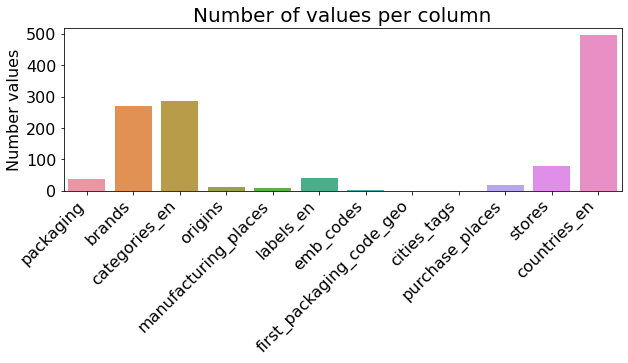

In [64]:
dataframe_distribution_overview(tags)

#### 3.2.4.1 Original

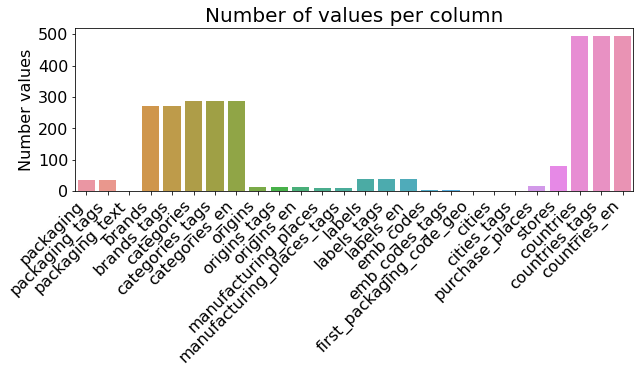

In [65]:
dataframe_distribution_overview(data[tags_features])

***
## 3.3 Ingredients group

### 3.3.1 Overview

In [66]:
ingredients_features = data.loc[:, "ingredients_text":"traces_tags"].columns
ingredients_features

Index(['ingredients_text', 'allergens', 'allergens_en', 'traces',
       'traces_tags'],
      dtype='object')

In [67]:
ingredients = data.loc[:, ingredients_features]

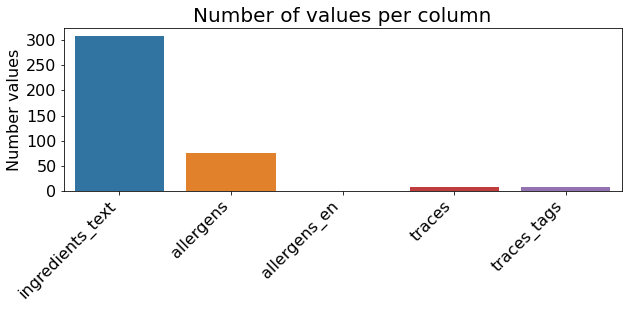

In [68]:
dataframe_distribution_overview(ingredients)

In [69]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ingredients_text  308 non-null    object 
 1   allergens         75 non-null     object 
 2   allergens_en      0 non-null      float64
 3   traces            8 non-null      object 
 4   traces_tags       9 non-null      object 
dtypes: float64(1), object(4)
memory usage: 39.6+ KB


In [70]:
ingredients.head()

,ingredients_text,allergens,allergens_en,traces,traces_tags
5370,"Cake mix (sugar, enriched wheat flour bleached...",en:milk,NaN,NaN,NaN
5474,NaN,NaN,NaN,NaN,NaN
5548,"Salt, sugar, spices including paprika and turm...",NaN,NaN,NaN,NaN
7989,"Peanuts, sugar, vegetable oil (peanut, cottons...",NaN,NaN,NaN,NaN
1584,NaN,NaN,NaN,NaN,NaN


***
### 3.3.2 Usability

#### 3.3.2.1 Usability: allergens_en

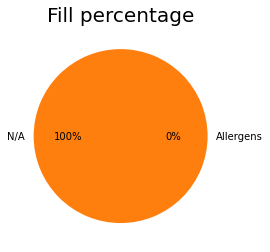

In [71]:
feature_filling(ingredients, "allergens_en", "Allergens")

In [72]:
ingredients.drop(columns=["allergens_en"], inplace=True)

***
### 3.3.3 Redundancy

#### 3.3.3.1 Redundancy: traces, traces_tags

In [73]:
ingredients.loc[:, ["traces", "traces_tags"]].loc[ingredients.traces.notna() & ingredients.traces_tags.notna()].iloc[:20]

,traces,traces_tags
2109,"en:nuts,en:soybeans","en:nuts,en:soybeans"
2865,"en:nuts,en:peanuts","en:nuts,en:peanuts"
878,"en:gluten,en:milk,en:nuts","en:gluten,en:milk,en:nuts"
4720,"en:gluten,en:nuts,en:sesame-seeds,en:soybeans","en:gluten,en:nuts,en:sesame-seeds,en:soybeans"
3547,"en:gluten,en:milk,en:nuts,en:peanuts","en:gluten,en:milk,en:nuts,en:peanuts"
2289,en: en:Può contenere latte,en:en-puo-contenere-latte
420,"en:nuts,en:sesame-seeds,en:soybeans","en:nuts,en:sesame-seeds,en:soybeans"
3515,en:gluten,en:gluten


There is, at first sight, no better feature. We will keep "traces"

In [74]:
ingredients.drop(columns=["traces_tags"], inplace=True)

***
### 3.3.4 Conclusion

In [75]:
ingredients.describe()

,ingredients_text,allergens,traces
count,308,75,8
unique,300,26,8
top,"Milk, skim milk, vitamin a palmitate, vitamin d3.",en:milk,"en:gluten,en:nuts,en:sesame-seeds,en:soybeans"
freq,5,21,1


In [76]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ingredients_text  308 non-null    object
 1   allergens         75 non-null     object
 2   traces            8 non-null      object
dtypes: object(3)
memory usage: 31.8+ KB


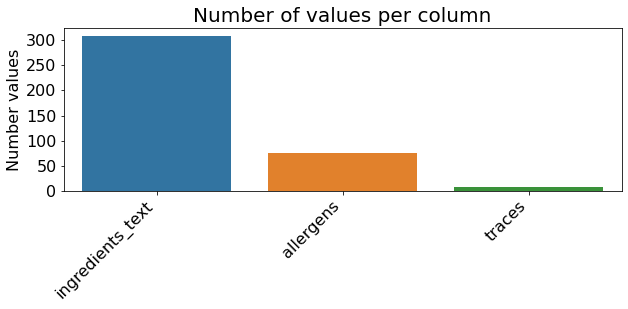

In [77]:
dataframe_distribution_overview(ingredients)

#### 3.3.4.1 Original

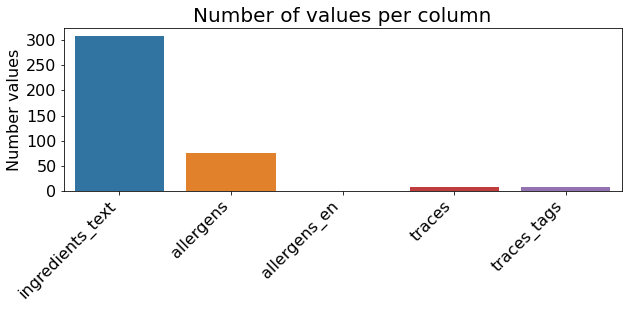

In [78]:
dataframe_distribution_overview(data[ingredients_features])

***
## 3.4 Misc datas group

#### 3.4.1 Overview

In [79]:
misc_features = data.loc[:,"serving_size":"image_nutrition_small_url"].columns
misc_features

Index(['serving_size', 'serving_quantity', 'no_nutriments', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner',
       'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [80]:
misc = data.loc[:, misc_features]

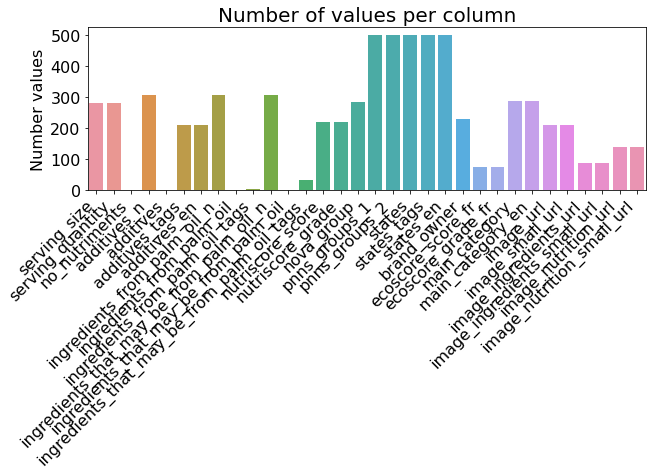

In [81]:
dataframe_distribution_overview(misc)

In [82]:
misc.iloc[:, :16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   serving_size                                281 non-null    object 
 1   serving_quantity                            281 non-null    float64
 2   no_nutriments                               0 non-null      float64
 3   additives_n                                 308 non-null    float64
 4   additives                                   0 non-null      float64
 5   additives_tags                              211 non-null    object 
 6   additives_en                                211 non-null    object 
 7   ingredients_from_palm_oil_n                 308 non-null    float64
 8   ingredients_from_palm_oil                   0 non-null      float64
 9   ingredients_from_palm_oil_tags              3 non-null      object 
 10  ingredient

In [83]:
misc.iloc[:, 16:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pnns_groups_1                500 non-null    object 
 1   pnns_groups_2                500 non-null    object 
 2   states                       500 non-null    object 
 3   states_tags                  500 non-null    object 
 4   states_en                    500 non-null    object 
 5   brand_owner                  230 non-null    object 
 6   ecoscore_score_fr            76 non-null     float64
 7   ecoscore_grade_fr            76 non-null     object 
 8   main_category                287 non-null    object 
 9   main_category_en             287 non-null    object 
 10  image_url                    212 non-null    object 
 11  image_small_url              212 non-null    object 
 12  image_ingredients_url        88 non-null     object 
 13  image_ingredient

In [84]:
misc.head(1)

,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,...,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
5370,1 SLICE (75 g),75.0,NaN,17.0,NaN,"en:e129,en:e150c,en:e1520,en:e263,en:e322,en:e...","E129 - Allura red ac,E150c - Ammonia caramel,E...",0.0,NaN,NaN,...,NaN,NaN,en:cakes,Cakes,NaN,NaN,NaN,NaN,NaN,NaN


***
### 3.4.2 Usability

These features are competely empty and then will be no needed:
- no_nutriments
- additives
- ingredients_from_palm_oil
- ingredients_that_may_be_from_palm_oil

These features are almost empty, we will get rid of them too:
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_tags

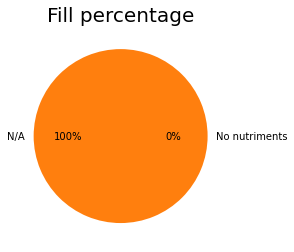

In [85]:
feature_filling(misc, "no_nutriments", "No nutriments")

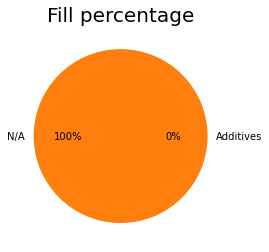

In [86]:
feature_filling(misc, "additives", "Additives")

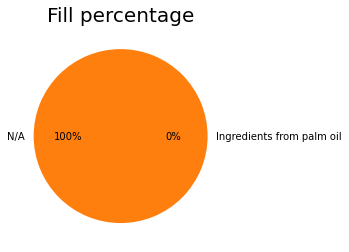

In [87]:
feature_filling(misc, "ingredients_from_palm_oil", "Ingredients from palm oil")

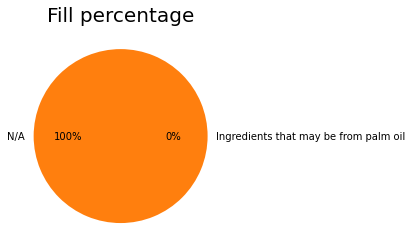

In [88]:
feature_filling(misc, "ingredients_that_may_be_from_palm_oil", "Ingredients that may be from palm oil")

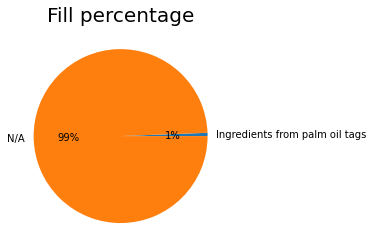

In [89]:
feature_filling(misc, "ingredients_from_palm_oil_tags", "Ingredients from palm oil tags")

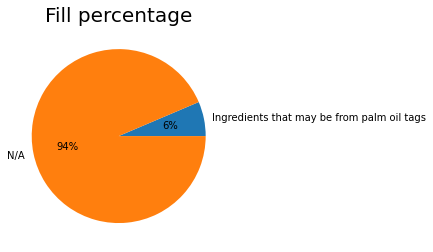

In [90]:
feature_filling(misc, "ingredients_that_may_be_from_palm_oil_tags", "Ingredients that may be from palm oil tags")

In [91]:
misc.drop(columns=["no_nutriments", "additives", "ingredients_from_palm_oil", "ingredients_that_may_be_from_palm_oil", "ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil_tags"], inplace=True)

***
### 3.4.3 Redundancy

#### 3.4.3.1 Redundancy: serving_siez, serving_quantity

In [92]:
misc.loc[:, ["serving_size", "serving_quantity"]].iloc[:20]

,serving_size,serving_quantity
5370,1 SLICE (75 g),75.0
5474,NaN,NaN
5548,0.25 tsp (1.2 g),1.2
7989,0.25 cup (28 g),28.0
1584,NaN,NaN
2726,NaN,NaN
74,NaN,NaN
5685,1 SLICE (29 g),29.0
2294,NaN,NaN
3291,1 DUNKER (37 g),37.0


It appears that the feature "serving_size" is non homogeneous in term of units. The feature "serving_quantity" on the other hand, seems to be only in the same unit (g).
We will keep "serving_quantity"

In [93]:
misc.drop(columns=["serving_size"], inplace=True)

***
#### 3.4.3.2 Redundancy: additives_tags, additives_en

In [94]:
misc.loc[:, ["additives_n", "additives_tags", "additives_en"]].iloc[:10]

,additives_n,additives_tags,additives_en
5370,17.0,"en:e129,en:e150c,en:e1520,en:e263,en:e322,en:e...","E129 - Allura red ac,E150c - Ammonia caramel,E..."
5474,NaN,NaN,NaN
5548,0.0,NaN,NaN
7989,1.0,en:e415,E415 - Xanthan gum
1584,NaN,NaN,NaN
2726,NaN,NaN,NaN
74,NaN,NaN,NaN
5685,3.0,"en:e282,en:e341,en:e341i,en:e517","E282 - Calcium propionate,E341 - Calcium phosp..."
2294,NaN,NaN,NaN
3291,12.0,"en:e322,en:e322i,en:e339ii,en:e406,en:e410,en:...","E322 - Lecithins,E322i - Lecithin,E339ii - Dis..."


The feature "additives_en" contains more informations and seems to be easier to parse compare to "additives_tags". Regarding "additives_n" it's the number of additives, there is no direct redundancy for that feature, we can keep it.
We will keep "additives_en" and "additives_n".

In [95]:
misc.drop(columns=["additives_tags"], inplace=True)

***
#### 3.4.3.3 Redundancy: nutriscore_score, nutriscore_grade

In [96]:
misc.loc[:, ["nutriscore_score", "nutriscore_grade"]].loc[misc.nutriscore_score.notna() & misc.nutriscore_grade.notna()].iloc[:20]

,nutriscore_score,nutriscore_grade
5370,25.0,e
7989,13.0,d
74,17.0,d
5685,3.0,c
3291,22.0,e
9352,3.0,c
8447,11.0,d
8654,23.0,e
2109,15.0,d
332,6.0,c


We will keep both fields as one is quantitative and other is qualitative.

***
#### 3.4.3.4 Redundancy: pnns_groups_1, pnns_groups_2

In [97]:
misc.loc[:, ["pnns_groups_1", "pnns_groups_2"]].loc[misc.pnns_groups_1.notna()].iloc[:20]

,pnns_groups_1,pnns_groups_2
5370,Sugary snacks,Biscuits and cakes
5474,unknown,unknown
5548,unknown,unknown
7989,unknown,unknown
1584,unknown,unknown
2726,unknown,unknown
74,Composite foods,One-dish meals
5685,Cereals and potatoes,Bread
2294,unknown,unknown
3291,Sugary snacks,Biscuits and cakes


Both features don't contains same value, we will keep them.

***
#### 3.4.3.5 Redundancy: states, states_tags, states_en

In [98]:
misc.loc[:, ["states", "states_tags", "states_en"]].iloc[:10]

,states,states_tags,states_en
5370,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
5474,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
5548,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
7989,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
1584,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
2726,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
74,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
5685,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
2294,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
3291,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."


Seems to be all useless. Let's see how many rows doesn't contains 'to-be-completed' or 'To be completed' in those features.

In [99]:
misc.loc[~misc.states.str.contains("to-be-completed")].states.count()

0

In [100]:
misc.loc[~misc.states_tags.str.contains("to-be-completed")].states_tags.count()

0

In [101]:
misc.loc[~misc.states_en.str.contains("To be completed")].states_en.count()

7

These features contains no usefull informations, we will get rid of them.

In [102]:
misc.drop(columns=["states", "states_tags", "states_en"], inplace=True)

***
#### 3.4.3.6 Redundancy: ecoscore_score_fr, ecoscore_grade_fr

In [103]:
misc.loc[:, ["ecoscore_score_fr", "ecoscore_grade_fr"]].loc[misc.ecoscore_score_fr.notna() & misc.ecoscore_grade_fr.notna()].iloc[:20]

,ecoscore_score_fr,ecoscore_grade_fr
2109,41.0,c
332,27.0,d
7102,34.0,d
7800,34.0,d
7064,71.0,b
8637,80.0,b
9124,61.0,b
1795,77.0,b
9403,59.0,c
2912,75.0,b


As the nutriscore, both ecoscore are usefull, we will keep both.

***
#### 3.4.3.7 Redundancy: main_category, main_category_en

In [104]:
misc.loc[:, ["main_category", "main_category_en"]].iloc[:20]

,main_category,main_category_en
5370,en:cakes,Cakes
5474,en:syrups,Syrups
5548,en:condiments,Condiments
7989,en:snacks,Snacks
1584,NaN,NaN
2726,NaN,NaN
74,en:corned-beef,Corned-beef
5685,en:breads,Breads
2294,NaN,NaN
3291,en:cakes,Cakes


We will keep "main_category_en"

In [105]:
misc.drop(columns=["main_category"], inplace=True)

***
### 3.4.4 Conclusion

In [106]:
misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   serving_quantity                         281 non-null    float64
 1   additives_n                              308 non-null    float64
 2   additives_en                             211 non-null    object 
 3   ingredients_from_palm_oil_n              308 non-null    float64
 4   ingredients_that_may_be_from_palm_oil_n  308 non-null    float64
 5   nutriscore_score                         221 non-null    float64
 6   nutriscore_grade                         221 non-null    object 
 7   nova_group                               283 non-null    float64
 8   pnns_groups_1                            500 non-null    object 
 9   pnns_groups_2                            500 non-null    object 
 10  brand_owner                              230 n

In [107]:
misc.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr
count,281.000000,308.000000,308.000000,308.000000,221.000000,283.000000,76.000000
mean,82.259644,3.217532,0.009740,0.107143,10.280543,3.522968,42.907895
std,90.680895,3.933662,0.098371,0.320140,9.188581,0.983193,22.510547
min,0.000000,0.000000,0.000000,0.000000,-8.000000,1.000000,-17.000000
25%,28.000000,0.000000,0.000000,0.000000,2.000000,4.000000,33.250000
50%,40.000000,2.000000,0.000000,0.000000,11.000000,4.000000,36.000000
75%,106.000000,5.000000,0.000000,0.000000,18.000000,4.000000,59.000000
max,507.000000,23.000000,1.000000,2.000000,30.000000,4.000000,99.000000


In [108]:
misc.loc[:, :"main_category_en"].describe(include=[object])

,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category_en
count,211,221,500,500,230,76,287
unique,182,5,10,28,50,4,130
top,"E322 - Lecithins,E322i - Lecithin",d,unknown,unknown,The Kroger Co.,d,Snacks
freq,10,69,288,288,131,37,20


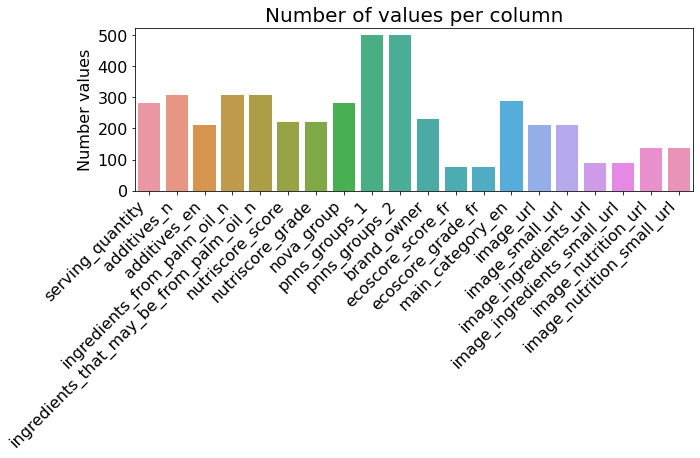

In [109]:
dataframe_distribution_overview(misc)

#### 3.4.4.1 Original

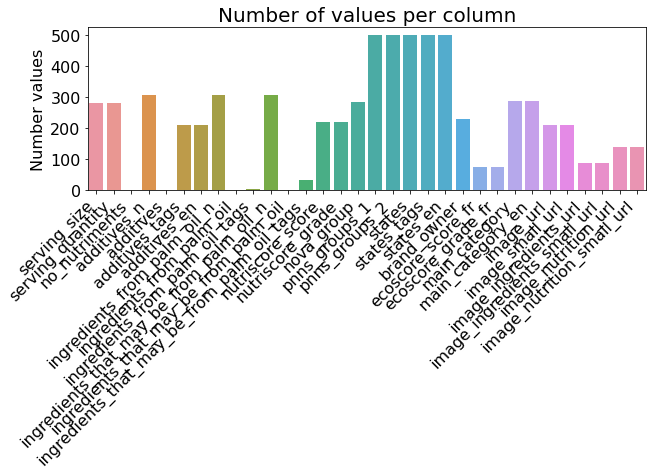

In [110]:
dataframe_distribution_overview(data[misc_features])

***
## 3.5 Nutrition facts group

### 3.5.1 Overview

In [111]:
nutr_features = data.loc[:, "energy-kj_100g":"carnitine_100g"].columns
nutr_features

Index(['energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=111)

In [112]:
nutr = data.loc[:, nutr_features]

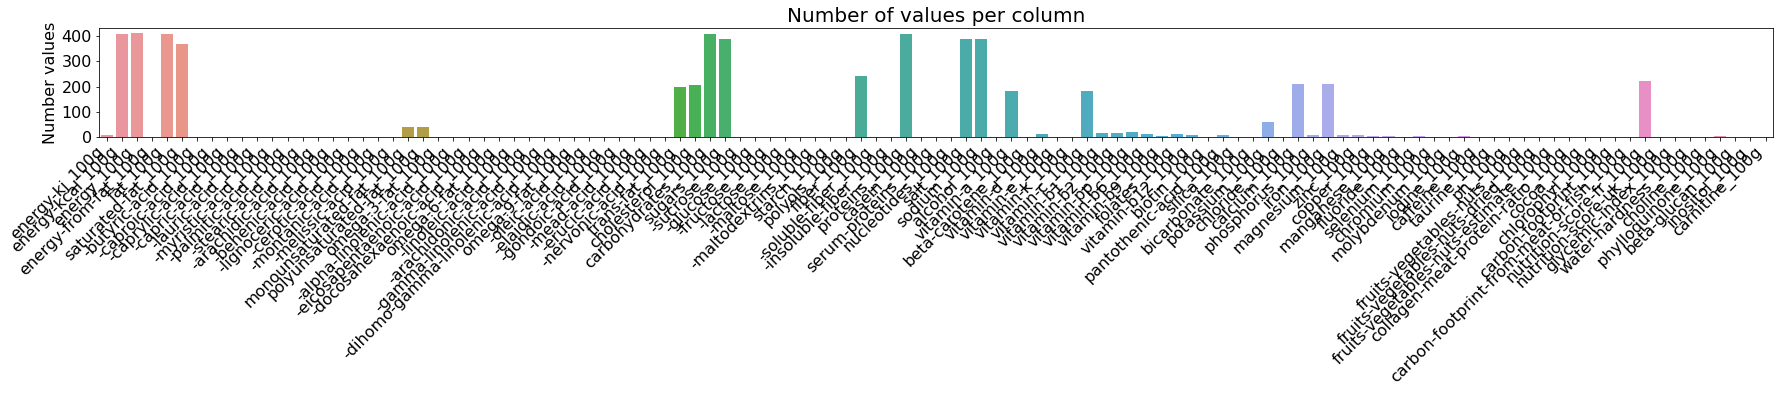

In [113]:
dataframe_distribution_overview(nutr, figsize=(30, 2))

In [114]:
nutr.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   energy-kj_100g        6 non-null      float64
 1   energy-kcal_100g      407 non-null    float64
 2   energy_100g           411 non-null    float64
 3   energy-from-fat_100g  1 non-null      float64
 4   fat_100g              408 non-null    float64
 5   saturated-fat_100g    367 non-null    float64
 6   -butyric-acid_100g    0 non-null      float64
 7   -caproic-acid_100g    0 non-null      float64
 8   -caprylic-acid_100g   0 non-null      float64
 9   -capric-acid_100g     0 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [115]:
nutr.iloc[:, 10:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   -lauric-acid_100g      0 non-null      float64
 1   -myristic-acid_100g    0 non-null      float64
 2   -palmitic-acid_100g    0 non-null      float64
 3   -stearic-acid_100g     0 non-null      float64
 4   -arachidic-acid_100g   0 non-null      float64
 5   -behenic-acid_100g     0 non-null      float64
 6   -lignoceric-acid_100g  0 non-null      float64
 7   -cerotic-acid_100g     0 non-null      float64
 8   -montanic-acid_100g    0 non-null      float64
 9   -melissic-acid_100g    0 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [116]:
nutr.iloc[:, 20:30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   monounsaturated-fat_100g     38 non-null     float64
 1   polyunsaturated-fat_100g     38 non-null     float64
 2   omega-3-fat_100g             0 non-null      float64
 3   -alpha-linolenic-acid_100g   0 non-null      float64
 4   -eicosapentaenoic-acid_100g  0 non-null      float64
 5   -docosahexaenoic-acid_100g   0 non-null      float64
 6   omega-6-fat_100g             0 non-null      float64
 7   -linoleic-acid_100g          0 non-null      float64
 8   -arachidonic-acid_100g       0 non-null      float64
 9   -gamma-linolenic-acid_100g   0 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [117]:
nutr.iloc[:, 30:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   -dihomo-gamma-linolenic-acid_100g  0 non-null      float64
 1   omega-9-fat_100g                   0 non-null      float64
 2   -oleic-acid_100g                   0 non-null      float64
 3   -elaidic-acid_100g                 0 non-null      float64
 4   -gondoic-acid_100g                 0 non-null      float64
 5   -mead-acid_100g                    0 non-null      float64
 6   -erucic-acid_100g                  0 non-null      float64
 7   -nervonic-acid_100g                0 non-null      float64
 8   trans-fat_100g                     199 non-null    float64
 9   cholesterol_100g                   207 non-null    float64
dtypes: float64(10)
memory usage: 59.1 KB


In [118]:
nutr.iloc[:, 40:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carbohydrates_100g   407 non-null    float64
 1   sugars_100g          390 non-null    float64
 2   -sucrose_100g        0 non-null      float64
 3   -glucose_100g        0 non-null      float64
 4   -fructose_100g       0 non-null      float64
 5   -lactose_100g        0 non-null      float64
 6   -maltose_100g        0 non-null      float64
 7   -maltodextrins_100g  0 non-null      float64
 8   starch_100g          0 non-null      float64
 9   polyols_100g         1 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [119]:
nutr.iloc[:, 50:60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fiber_100g             240 non-null    float64
 1   -soluble-fiber_100g    1 non-null      float64
 2   -insoluble-fiber_100g  0 non-null      float64
 3   proteins_100g          408 non-null    float64
 4   casein_100g            0 non-null      float64
 5   serum-proteins_100g    0 non-null      float64
 6   nucleotides_100g       0 non-null      float64
 7   salt_100g              387 non-null    float64
 8   sodium_100g            387 non-null    float64
 9   alcohol_100g           1 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [120]:
nutr.iloc[:, 60:70].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vitamin-a_100g      182 non-null    float64
 1   beta-carotene_100g  0 non-null      float64
 2   vitamin-d_100g      10 non-null     float64
 3   vitamin-e_100g      0 non-null      float64
 4   vitamin-k_100g      0 non-null      float64
 5   vitamin-c_100g      183 non-null    float64
 6   vitamin-b1_100g     17 non-null     float64
 7   vitamin-b2_100g     16 non-null     float64
 8   vitamin-pp_100g     20 non-null     float64
 9   vitamin-b6_100g     10 non-null     float64
dtypes: float64(10)
memory usage: 59.1 KB


In [121]:
nutr.iloc[:, 70:80].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vitamin-b9_100g        2 non-null      float64
 1   folates_100g           10 non-null     float64
 2   vitamin-b12_100g       8 non-null      float64
 3   biotin_100g            0 non-null      float64
 4   pantothenic-acid_100g  6 non-null      float64
 5   silica_100g            0 non-null      float64
 6   bicarbonate_100g       0 non-null      float64
 7   potassium_100g         58 non-null     float64
 8   chloride_100g          0 non-null      float64
 9   calcium_100g           211 non-null    float64
dtypes: float64(10)
memory usage: 59.1 KB


In [122]:
nutr.iloc[:, 80:90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   phosphorus_100g  6 non-null      float64
 1   iron_100g        210 non-null    float64
 2   magnesium_100g   8 non-null      float64
 3   zinc_100g        8 non-null      float64
 4   copper_100g      3 non-null      float64
 5   manganese_100g   5 non-null      float64
 6   fluoride_100g    0 non-null      float64
 7   selenium_100g    4 non-null      float64
 8   chromium_100g    0 non-null      float64
 9   molybdenum_100g  0 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [123]:
nutr.iloc[:, 90:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   iodine_100g                           4 non-null      float64
 1   caffeine_100g                         0 non-null      float64
 2   taurine_100g                          0 non-null      float64
 3   ph_100g                               0 non-null      float64
 4   fruits-vegetables-nuts_100g           0 non-null      float64
 5   fruits-vegetables-nuts-dried_100g     0 non-null      float64
 6   fruits-vegetables-nuts-estimate_100g  1 non-null      float64
 7   collagen-meat-protein-ratio_100g      0 non-null      float64
 8   cocoa_100g                            1 non-null      float64
 9   chlorophyl_100g                       0 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [124]:
nutr.iloc[:, 100:110].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   carbon-footprint_100g                    0 non-null      float64
 1   carbon-footprint-from-meat-or-fish_100g  0 non-null      float64
 2   nutrition-score-fr_100g                  221 non-null    float64
 3   nutrition-score-uk_100g                  0 non-null      float64
 4   glycemic-index_100g                      0 non-null      float64
 5   water-hardness_100g                      0 non-null      float64
 6   choline_100g                             0 non-null      float64
 7   phylloquinone_100g                       4 non-null      float64
 8   beta-glucan_100g                         0 non-null      float64
 9   inositol_100g                            0 non-null      float64
dtypes: float64(10)
memory usage: 59.1 KB


In [125]:
nutr.iloc[:, 110:120].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5370 to 4699
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carnitine_100g  0 non-null      float64
dtypes: float64(1)
memory usage: 24.0 KB


***
### 3.5.2 Usability

All features that have less than 1% fill percentage will be dropped.

In [126]:
index_lesser_than_percentage = index_lth(pd, np, nutr, 5)
index_lesser_than_percentage

Index(['energy-kj_100g', 'energy-from-fat_100g', '-butyric-acid_100g',
       '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g',
       '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g',
       '-melissic-acid_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g',
       '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g',
       'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g',
       '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g',
       '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g',
       '-nervonic-acid_100g', '-sucrose_100g', '-glucose_100g',
       '-fructose_100g', '-lactose_100g', '-maltose_100g',
       '-maltodextrins_100g', 'starch_100g', 'polyols_100g',
       '-s

In [127]:
nutr.drop(columns=index_lesser_than_percentage, inplace=True)

***
### 3.5.3 Redundancy

#### 3.5.3.1 Redundancy: nutrition-score-fr_100g

nutrition-score-fr_100g is redundant with "nutriscore_score" and "nutriscore_grade". It will be dropped.

In [128]:
nutr.drop(columns=["nutrition-score-fr_100g"], inplace=True)

***
#### 3.5.3.2 Redundancy: energy-kj_100g, energy-kcal_100g, energy_100g

In [129]:
nutr.loc[:, ["energy-kj_100g", "energy-kcal_100g", "energy_100g"]].loc[nutr["energy-kj_100g"].notna()].iloc[:10]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['energy-kj_100g'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

The "energy-kj_100g" is much emptier than the two other energy features and bring no additional infos.
The feature "energy-kcal_100g" has explicit unit and is the most filled.

We will keep only "energy-kcal_100g"

In [ ]:
nutr.drop(columns=["energy-kj_100g", "energy_100g"], inplace=True)

***
### 3.5.4 Conclusion

In [ ]:
nutr.info()

In [ ]:
nutr.describe()

In [ ]:
dataframe_distribution_overview(nutr)

#### 3.5.4.1 Original

In [ ]:
dataframe_distribution_overview(data[nutr_features], figsize=(30, 2))

***
## 3.6 Results

In [ ]:
features = general_infos.join([tags, ingredients, misc, nutr])

In [ ]:
features.shape

In [ ]:
dataframe_distribution_overview(features, figsize=(30, 2))

***
# 4 Saving

In [ ]:
features.shape

In [ ]:
features.to_csv("datas/sample.csv", sep=";")

***
# ? Nutriscore

## Nutriscore feature analysis

In [ ]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [ ]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

In [ ]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [ ]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [ ]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [ ]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [ ]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [ ]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

In [ ]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.